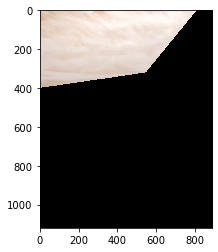

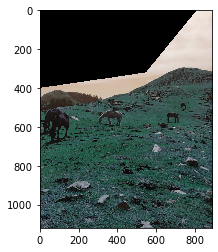

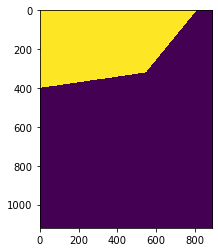

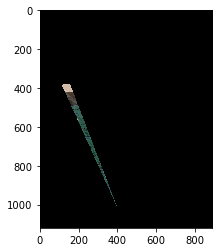

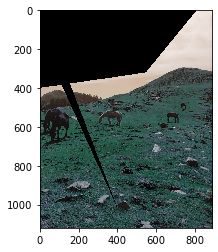

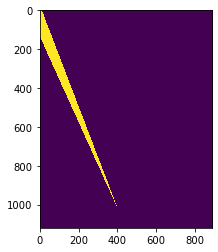

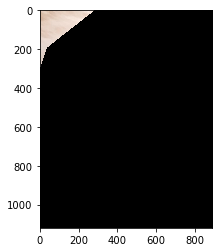

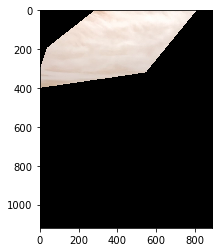

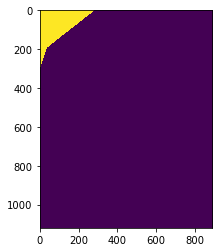

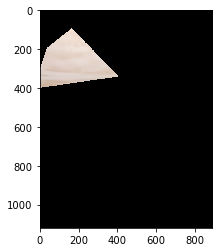

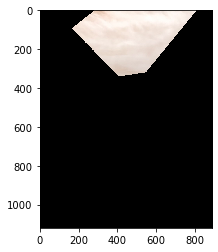

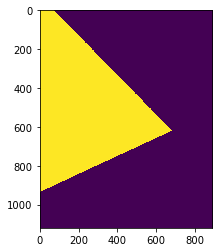

In [6]:
#!/usr/bin/env python
# coding: utf-8

# In[64]:


import cv2
import numpy as np
import random
import os
from os import listdir
import sys
from PIL import Image
# img = cv2.imread("abc.jpg", cv2.IMREAD_COLOR)


# In[65]:


from shutil import copyfile


# In[66]:
def convertImage(path, path1):
    tmp = Image.open(path)
    tmp = tmp.convert("RGBA")
    originalimg = tmp.getdata()
    convertedimg = []
    for val in originalimg:
        if val[0] == 0 and val[1] == 0 and val[2] == 0:
            convertedimg.append((255, 255, 255, 0))
        else:
            convertedimg.append(val)
    tmp.putdata(convertedimg)
    tmp.save(path1, "PNG")
    
HomeDir="New Unity Project/Assets/Resources/"
Level= 4##Enter level here
DirName = "Level" + str(Level) + "/"
FileName="Level" + str(Level) + ".jpeg"
lst = listdir(HomeDir+DirName)
for i in lst:
    os.remove(HomeDir+DirName+i)

copyfile(HomeDir+FileName,HomeDir+DirName+FileName)



for i in range(0, 5):
    lst = listdir(HomeDir+DirName)
    img_name = random.choice(lst)
    img = cv2.imread(HomeDir+DirName+img_name, cv2.IMREAD_COLOR)
    
    mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)
#     pts = np.array([[0,0],[0,random.randint(0,img.shape[0])],[img.shape[1],img.shape[0]],[random.randint(0,img.shape[1]),0]])
    xs=[]
    ys=[]
    for j in range(4):
        xs.append(random.randint(0,img.shape[1]))
        ys.append(random.randint(0,img.shape[0]))
    xs.sort()
    ys.sort()
#     print([[xs[0],ys[0]],[xs[1],ys[1]],[xs[2],ys[2]],[xs[3],ys[3]]])
#     pts = np.array([[xs[0],ys[0]],[xs[1],ys[1]],[xs[2],ys[2]],[xs[3],ys[3]]])
    pts = np.array([[0,0],[0,random.randint(0,img.shape[0])],[random.randint(0,img.shape[1]),random.randint(0,img.shape[0])],[random.randint(0,img.shape[1]),0]])
    _=cv2.drawContours(mask, np.int32([pts]),0, 255, -1)
    
    img1 = img.copy()
    img2 = img.copy()
    img1[mask==0] = 0
    img2[mask>0] = 0
    from matplotlib import pyplot as plt
    plt.imshow(img1, interpolation='nearest')
    plt.show()
    plt.imshow(img2, interpolation='nearest')
    plt.show()
    plt.imshow(mask, interpolation='nearest')
    plt.show()
    os.remove(HomeDir+DirName+img_name)
    cv2.imwrite(HomeDir+DirName+"/img"+str(2*i)+".png", img1)
    cv2.imwrite(HomeDir+DirName+"/img"+str(2*i+1)+".png", img2)

for file in listdir(HomeDir+DirName):
    convertImage(HomeDir+DirName+file,HomeDir+DirName+file)




